In [2]:
import pandas as pd
import matplotlib.pyplot as plt
#pd.set_option('display.max_rows', None)
# Carica il dataset in un DataFrame
df = pd.read_csv('Fire-Incidents.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11214 entries, 0 to 11213
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Area_of_Origin                            11214 non-null  object 
 1   Business_Impact                           11214 non-null  object 
 2   Civilian_Casualties                       11214 non-null  int64  
 3   Count_of_Persons_Rescued                  11214 non-null  int64  
 4   Estimated_Dollar_Loss                     11214 non-null  int64  
 5   Estimated_Number_Of_Persons_Displaced     11214 non-null  int64  
 6   Ext_agent_app_or_defer_time               11214 non-null  object 
 7   Extent_Of_Fire                            11214 non-null  object 
 8   Fire_Alarm_System_Impact_on_Evacuation    11214 non-null  object 
 9   Fire_Alarm_System_Operation               11214 non-null  object 
 10  Fire_Alarm_System_Presence        

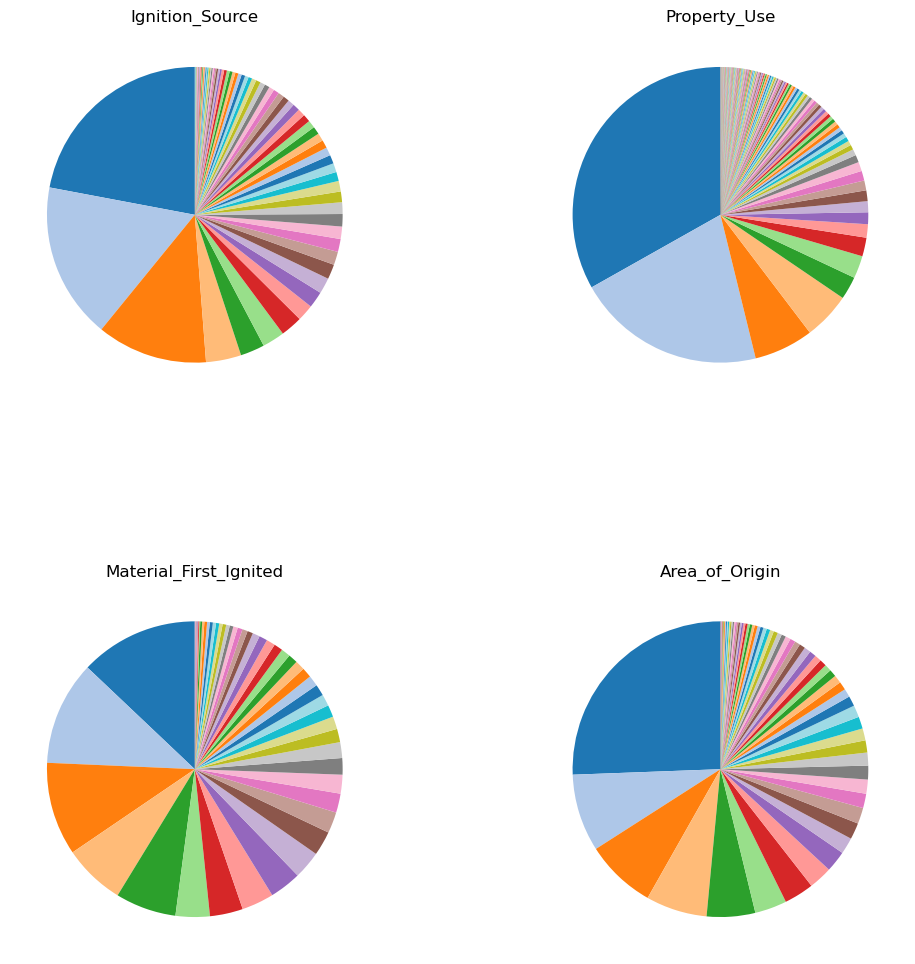

In [3]:
# import matplotlib
import matplotlib.pyplot as plt

# create a figure with 2 rows and 2 columns of subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

# create a list of column names to plot
columns_to_plot = ["Ignition_Source", "Property_Use", "Material_First_Ignited", "Area_of_Origin"]

# loop over the column names and plot each subplot
for i, column in enumerate(columns_to_plot):
    # select the current subplot
    ax = axs[i//2, i%2]
    
    # create a dictionary to store the value counts for each category
    category_counts = {}

    # loop over the unique categories in the column
    for category in df[column].unique():
        # count the number of occurrences of the category
        count = (df[column] == category).sum()
        # add the count to the dictionary
        category_counts[category] = count

    # create a list of tuples from the dictionary, sorted by count
    sorted_categories = sorted(category_counts.items(), key=lambda x: x[1], reverse=True)

    # split the sorted categories and counts into separate lists
    sorted_categories, counts = zip(*sorted_categories)

    # create a list of colors for the pie chart
    colors = plt.cm.tab20.colors[:len(sorted_categories)]

    # create the pie chart
    ax.pie(counts, colors=colors, startangle=90)

    # add a title to the subplot
    ax.set_title(column)

# adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# show the plot
plt.show()


In [5]:
# check the size of the dataset
df.shape

(11214, 27)

In [6]:
# check for duplicated observations
df.duplicated().sum()

0

In [7]:
# check for missing values
df.isnull().sum()

Area_of_Origin                               0
Business_Impact                              0
Civilian_Casualties                          0
Count_of_Persons_Rescued                     0
Estimated_Dollar_Loss                        0
Estimated_Number_Of_Persons_Displaced        0
Ext_agent_app_or_defer_time                  0
Extent_Of_Fire                               0
Fire_Alarm_System_Impact_on_Evacuation       0
Fire_Alarm_System_Operation                  0
Fire_Alarm_System_Presence                   0
Fire_Under_Control_Time                      0
Ignition_Source                              0
Incident_Station_Area                        0
Incident_Ward                               33
Last_TFS_Unit_Clear_Time                     0
Latitude                                     0
Longitude                                    0
Material_First_Ignited                       0
Method_Of_Fire_Control                       0
Possible_Cause                               0
Property_Use 

In [8]:
df.dropna()
# check for missing values
df.isnull().sum()
df.drop(['Incident_Ward', 'Ext_agent_app_or_defer_time'], axis=1)

,Area_of_Origin,Business_Impact,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,Fire_Alarm_System_Presence,...,Longitude,Material_First_Ignited,Method_Of_Fire_Control,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time
0,Porch or Balcony,No business interruption,0,86,3000,0,Confined to object of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system did not operate,Fire alarm system present,...,-79.412479,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Fire with smoke showing only - including vehic...,2018-08-24T16:49:36,2018-08-24T16:54:09
1,Cooking Area or Kitchen,Undetermined,0,28,50000,28,Confined to part of room/area of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system operated,Fire alarm system present,...,-79.530419,Plastic,Extinguished by occupant,Under Investigation,Infirmary,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire extinguished prior to arrival,2018-11-24T07:09:12,2018-11-24T07:14:23
2,"Living Area (e.g. living, TV, recreation, etc)",Not applicable (not a business),1,16,1000000,130,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,Fire alarm system operated,Fire alarm system present,...,-79.373460,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Flames showing from small area (one storey or ...,2017-02-09T17:45:07,2017-02-09T17:48:49
3,Undetermined (formerly 98),May not resume operations,0,12,1000000,14,Entire Structure,Undetermined,Fire alarm system operation undetermined,Undetermined,...,-79.393700,Undetermined (formerly 98),Extinguished by fire department,Undetermined,"Clothing Store, Accessories, fur",Not applicable: Alarm operated OR presence/ope...,Type undetermined,Flames showing from large area (more than one ...,2012-10-30T00:42:01,2012-10-30T00:44:58
4,"Sleeping Area or Bedroom (inc. patients room, ...",Not applicable (not a business),8,11,125000,2,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,Fire alarm system operated,Fire alarm system present,...,-79.511539,Bedding,Extinguished by fire department,Suspected Arson,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire with no evidence from street,2018-07-08T04:08:50,2018-07-08T04:13:54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11209,"Trash, Rubbish Storage (inc garbage chute room...",No business interruption,0,0,0,0,Confined to object of origin,All persons (at risk of injury) evacuated as a...,Fire alarm system operated,Fire alarm system present,...,-79.373778,"Rubbish, Trash, Waste",Extinguished by automatic system,Improperly Discarded,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Fire with no evidence from street,2018-02-23T14:35:03,2018-02-23T14:38:33
11210,Other Storage Area,No business interruption,0,0,1000,0,Confined to object of origin,All persons (at risk of injury) evacuated as a...,Fire alarm system operated,Fire alarm system present,...,-79.280725,Undetermined (formerly 98),Extinguished by occupant,Electrical Failure,General Business Office,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire extinguished prior to arrival,2018-02-24T01:30:45,2018-02-24T01:36:59
11211,Other Storage Area,No business interruption,0,0,0,0,Confined to object of origin,All persons (at risk of injury) evacuated as a...,Fire ala

In [9]:
# check the statistics of the numerical columns
df.describe()

,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Incident_Station_Area,Incident_Ward,Latitude,Longitude
count,11214.000000,11214.000000,1.121400e+04,11214.000000,11214.000000,11181.000000,11214.000000,11214.000000
mean,0.112538,0.062154,4.294369e+04,17.274835,288.281880,19.582685,43.705190,-79.403323
std,0.456429,0.962587,5.339367e+05,119.071696,107.515995,11.762782,0.051183,0.101086
min,0.000000,0.000000,0.000000e+00,0.000000,111.000000,1.000000,43.588926,-79.635241
25%,0.000000,0.000000,2.500000e+02,0.000000,221.000000,10.000000,43.662474,-79.479273
50%,0.000000,0.000000,2.500000e+03,0.000000,314.000000,19.000000,43.697050,-79.403892
75%,0.000000,0.000000,1.500000e+04,1.000000,346.000000,28.000000,43.747770,-79.337150
max,15.000000,86.000000,5.000000e+07,999.000000,445.000000,44.000000,43.846200,-79.124410


## Analisi outliers
Possiamo notare che Civilian_Casualties, Count_of_Persons_Rescued, Estimated_Dollar_Loss, Estimated_Number_Of_Persons_Displaced presentano valori anomali in quanto presentano un valore di max maggiore della mean, il che potrebbe presagire presenza di outliers 

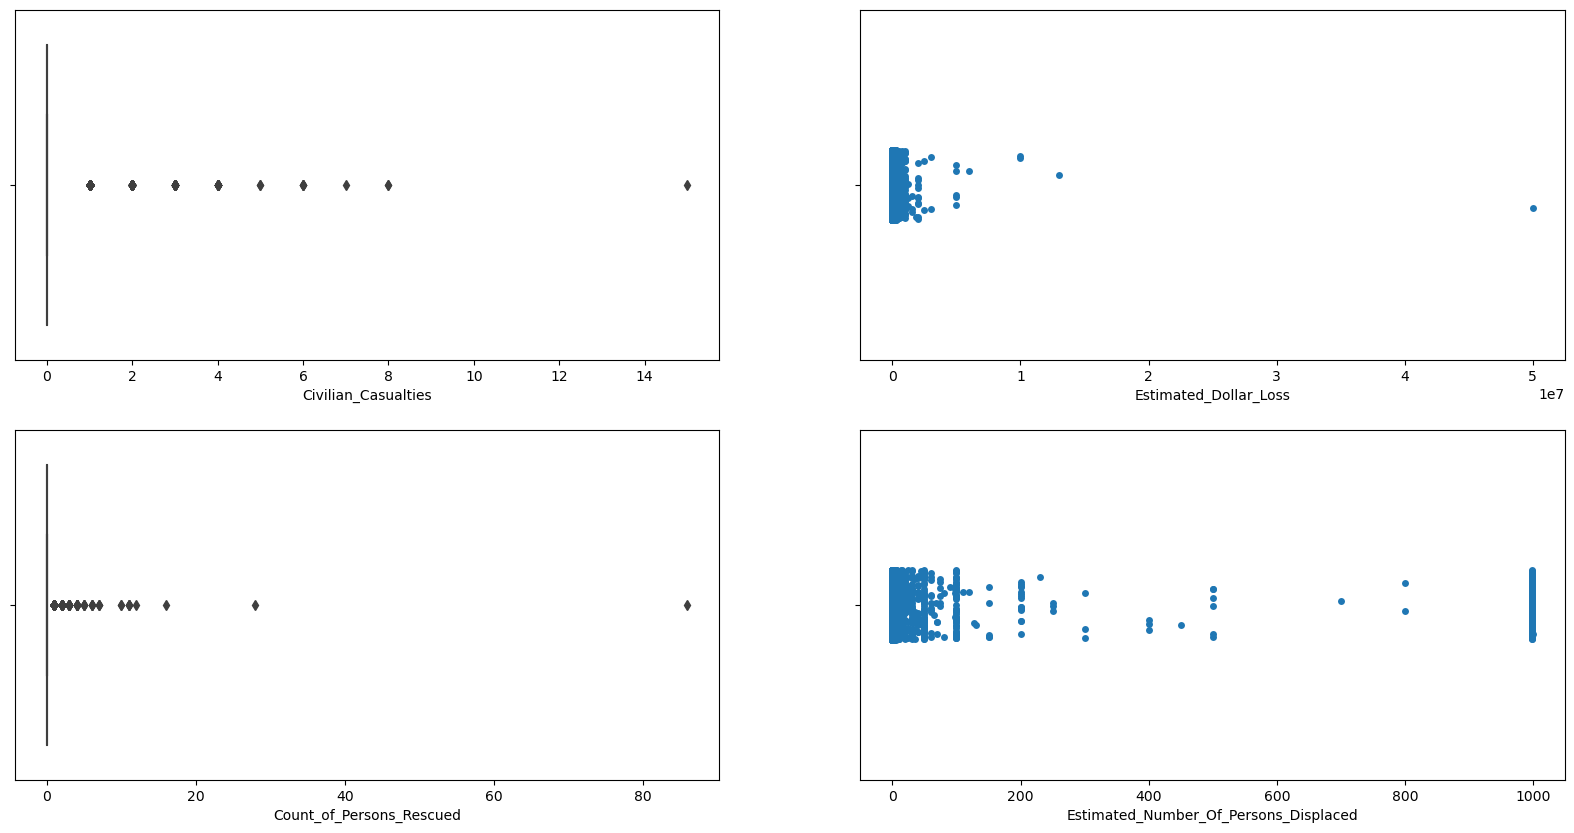

In [10]:
import seaborn as sns
fig= plt.figure(figsize=(20,10))
ax=fig.add_subplot(221)
sns.boxplot(x='Civilian_Casualties', data = df)

ax=fig.add_subplot(222)
sns.stripplot(data=df, x='Estimated_Dollar_Loss')
ax=fig.add_subplot(223)
sns.boxplot(x='Count_of_Persons_Rescued', data = df)
ax=fig.add_subplot(224)
sns.stripplot(data=df, x='Estimated_Number_Of_Persons_Displaced')
plt.show()

<AxesSubplot: xlabel='Estimated_Dollar_Loss'>

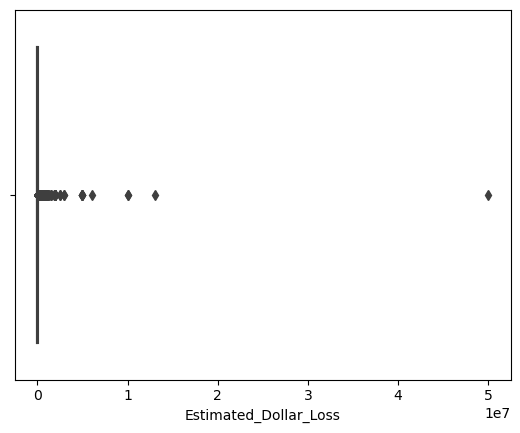

In [15]:
sns.boxplot(x='Estimated_Dollar_Loss', data = df)

In [12]:
df['Estimated_Dollar_Loss'].idxmax()
df.iloc[1184]

Area_of_Origin                                                            Under Investigation
Business_Impact                                                     May not resume operations
Civilian_Casualties                                                                         0
Count_of_Persons_Rescued                                                                    0
Estimated_Dollar_Loss                                                                50000000
Estimated_Number_Of_Persons_Displaced                                                     800
Ext_agent_app_or_defer_time                                               2019-05-07T03:34:02
Extent_Of_Fire                                                               Entire Structure
Fire_Alarm_System_Impact_on_Evacuation                                           Undetermined
Fire_Alarm_System_Operation                          Fire alarm system operation undetermined
Fire_Alarm_System_Presence                                  

Poiché si è ritenuto un valore anomalo viene eliminato. Il valore sembra essere piuttosto un segnaposto, o un errore di misurazione.

In [11]:
max_value = df["Estimated_Dollar_Loss"].max()
df = df[df["Estimated_Dollar_Loss"] != max_value]

In [12]:
df = df[df["Estimated_Number_Of_Persons_Displaced"] != 997]

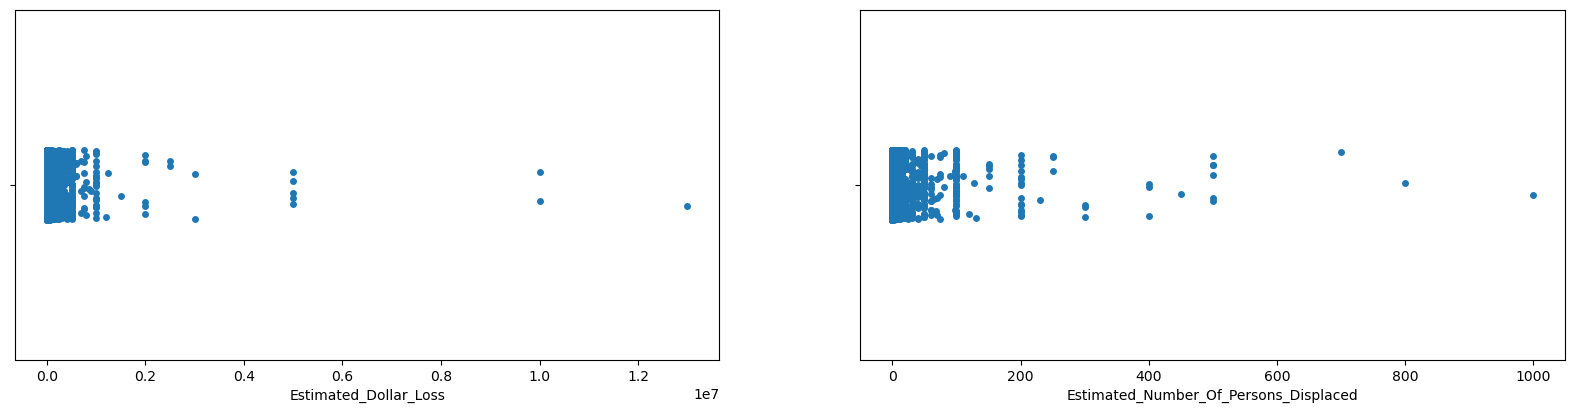

In [18]:
import seaborn as sns
fig= plt.figure(figsize=(20,10))


ax=fig.add_subplot(221)
sns.stripplot(data=df, x='Estimated_Dollar_Loss')

ax=fig.add_subplot(222)
sns.stripplot(data=df, x='Estimated_Number_Of_Persons_Displaced')
plt.show()

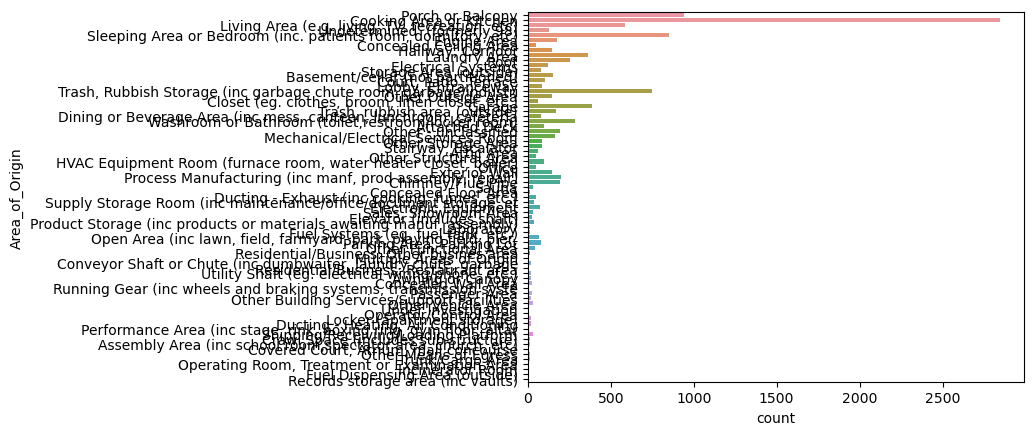

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(y="Area_of_Origin", data=df)
plt.show()


# Categorical sum

In [20]:
cat_data = df.select_dtypes(include=['object']).copy()
# Remove the Timestamp columns
cat_data = cat_data.drop(['Ext_agent_app_or_defer_time',
            'Fire_Under_Control_Time', 'Last_TFS_Unit_Clear_Time',
            'TFS_Alarm_Time', 'TFS_Arrival_Time'], axis = 1)
cat_data.describe(include = 'all').transpose()

,count,unique,top,freq
Area_of_Origin,11057,73,Cooking Area or Kitchen,2847
Business_Impact,11057,7,Not applicable (not a business),5036
Extent_Of_Fire,11057,12,Confined to object of origin,5101
Fire_Alarm_System_Impact_on_Evacuation,11057,7,"Not applicable: No fire alarm system, no perso...",3006
Fire_Alarm_System_Operation,11057,4,Fire alarm system operated,4495
Fire_Alarm_System_Presence,11057,4,Fire alarm system present,6173
Ignition_Source,11057,82,Undetermined,2418
Material_First_Ignited,11057,54,"Cooking Oil, Grease",1444
Method_Of_Fire_Control,11057,5,Extinguished by fire department,6929
Possible_Cause,11057,24,Undetermined,1688


<AxesSubplot: xlabel='Area_of_Origin', ylabel='count'>

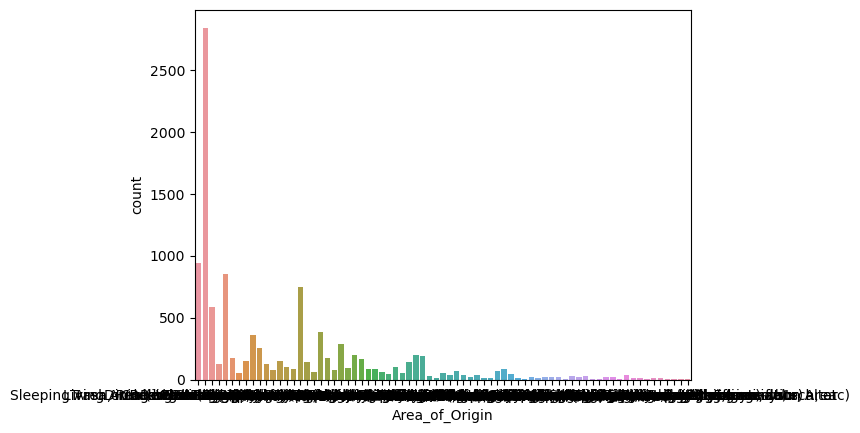

In [21]:
sns.countplot(x=df["Area_of_Origin"])

In [22]:
df['Area_of_Origin'].value_counts()

Cooking Area or Kitchen                                             2847
Porch or Balcony                                                     944
Sleeping Area or Bedroom (inc. patients room, dormitory, etc)        854
Trash, Rubbish Storage (inc garbage chute room, garbage/industri     749
Living Area (e.g. living, TV, recreation, etc)                       587
                                                                    ... 
Running Gear (inc wheels and braking systems, transmission syste       4
Under Investigation                                                    4
Incinerator Room                                                       3
Records storage area (inc vaults)                                      2
Fuel Dispensing Area (outside)                                         1
Name: Area_of_Origin, Length: 73, dtype: int64

In [23]:
# ottieni la lista dei valori che compaiono meno di 100 volte
rare_values = df['Area_of_Origin'].value_counts()[df['Area_of_Origin'].value_counts() < 100].index.tolist()

# sostituisci i valori rari con 'Other'
df['Area_of_Origin'].where(~df['Area_of_Origin'].isin(rare_values), other='Other', inplace=True)

df['Area_of_Origin'].value_counts()

Cooking Area or Kitchen                                             2847
Other                                                               1651
Porch or Balcony                                                     944
Sleeping Area or Bedroom (inc. patients room, dormitory, etc)        854
Trash, Rubbish Storage (inc garbage chute room, garbage/industri     749
Living Area (e.g. living, TV, recreation, etc)                       587
Garage                                                               384
Laundry Area                                                         360
Washroom or Bathroom (toilet,restroom/locker room)                   285
Roof                                                                 253
Process Manufacturing (inc manf, prod assembly, repair)              199
Other - unclassified                                                 195
Chimney/Flue Pipe                                                    194
Engine Area                                        

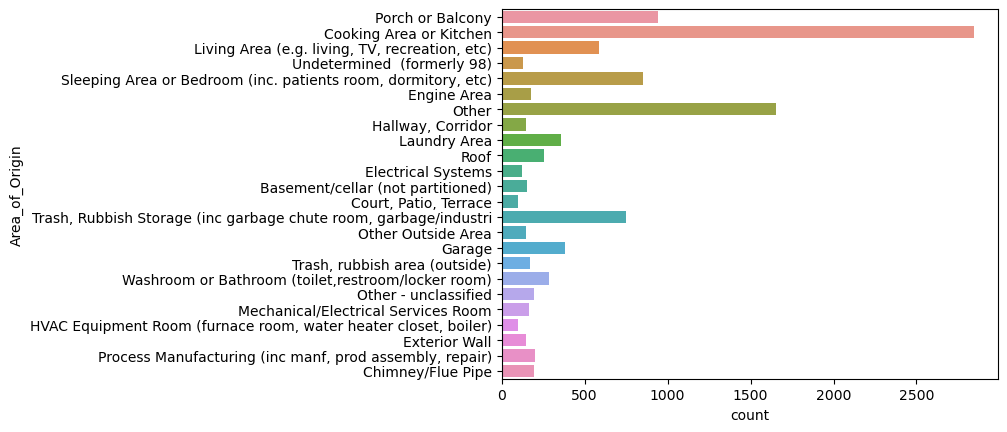

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(y="Area_of_Origin", data=df)
plt.show()

# Controlliamo Ignition_Source

In [25]:
import pandas as pd
pd.set_option('display.max_rows', None)


df['Ignition_Source'].value_counts()

Undetermined                                                        2418
Stove, Range-top burner                                             1903
Smoker's Articles (eg. cigarettes, cigars, pipes already ignited    1347
Oven                                                                 430
Clothes Dryer                                                        293
Candle                                                               272
Circuit Wiring - Copper                                              259
Cord, Cable for Appliance, Electrical Articles                       198
Blow Torch, Bunsen Burner                                            195
Other                                                                192
Cutting/Welding Equipment                                            180
Other Electrical                                                     163
Other Electrical Distribution Item                                   155
Vehicle - Electrical                               

In [26]:
df['Ignition_Source'].replace(['Fireplace Insert', 
                               'Fireworks', 
                               'Open Fire (eg. camp fire, rubbish fire, etc.)', 
                               'Fireplace - Factory Built', 
                               'Exposure, source open fire (inc campfire, rubbish fire)', 
                               'Lighters (open flame)', 'Outdoor fireplace/heater', 'Matches (open flame)', 
                               'Open Fired Barbeque - Fixed or Portable', 
                               'Other Open Flame Tools/Smokers Articles', 
                               'Matches or Lighters (unable to distinguish)', 
                               "Other Open Flame Tools/Smokers' Articles", 'Fireplace - Masonry'], 
                              'Fire-related', inplace=True)

In [27]:
df['Ignition_Source'].replace(['Christmas Lights, Decorative Lighting', 
                               'Static Electricity (spark)', 
                               'Lamp (eg. coal, oil, naphtha, etc.)', 
                               'Lightning', 
                               'Portable generator', 
                               'Florescent Lamp (includes ballast)', 
                               'Other Lighting Equipment', 
                               'Incandescent Lamp - Light Bulb, Spotlight', 
                               'Service/Utility Lines (includes power/hydro transmission lines)', 
                               'Terminations-Copper (incl receptacles, switches, lights)', 
                               'Other Electrical Distribution Item', 
                               'Other Electrical', 'Halogen Lamp or light', 
                               'Cord, Cable for Appliance, Electrical Articles', 
                               'Static Electricity (spark)', 
                               'Distribution Equipment (includes panel boards, fuses, circuit br', 
                               'Transformer'], 
                              'Electrical', inplace=True)

In [28]:
df['Ignition_Source'].replace(['Vehicle collision', 'Vehicle - Mechanical', 'Vehicle - Electrical'], 
                              'Vehicle', inplace=True)

In [29]:
df['Ignition_Source'].replace(['Microwave', 'Water Heater',
                               'Refrigerator, Freezer (includes vending machine)', 
                               'Washing Machine', 'Range Hood',
                               'Central Heating/Cooling Unit', 
                               'Air Conditioner - Window or Room Unit', 'Other Appliances', 
                               'Clothes Dryer', 
                               'Deep Fat Fryer', 'Oven'], 
                              'Home-Applicance', inplace=True)

In [30]:
df['Ignition_Source'].replace(['Space Heater - Fixed', 
                               'Wood burning stove', 
                               'Heat Treatment Equipment (eg. furnace, oven, kiln, quench tanks,', 
                               'Hot Ashes, Embers, Spark', 
                               'Wood burning stove',
                               'Space Heater - Portable', 
                               'Chimney - Masonry', 'Chimney - Factory Built', 
                               'Other Heating Equipment', 'Flue Pipe', 'Blow Torch, Bunsen Burner', 
                               'Candle', 'Stove, Range-top burner'], 
                              'Heat/combustion funds', inplace=True)

In [31]:
df['Ignition_Source'].replace(['Exposure, source structure semi-detached or attached', 
                               'Exposure, source structure detached', 
                               'Exposure, source vehicle (outside structure)', 
                               'Exposure, source grass, shrubs, trees', 'Exposure, source other'], 
                              'Exposure source', inplace=True)

In [32]:
df['Ignition_Source'].replace(['Circuit Wiring - Aluminum', 'Circuit Wiring - Copper', 
                               'Terminations-Aluminum (incl receptables, switches, lights)', 
                               'Extension Cord, Temporary Wiring'],
                              'Circuit Wiring', inplace=True)

In [33]:
df['Ignition_Source'].replace(['Rekindle', 'Meter', 'Iron, Pressing Machine',
'Chemical Processing Equipment (eg. reactors, distilling units, e', 'Salamander', 
                               'Electric Blanket, Heating Pad', 'Incinerator', 'Painting Equipment'],
                              'Other', inplace=True)



In [34]:
df['Ignition_Source'].replace(['Other Processing Equipment', 'Other Mechanical', 'Cutting/Welding Equipment'],
                              'Tools and Machinery', inplace=True)

In [35]:
df['Ignition_Source'].replace('Television, Radio, Stereo, Tape Recorder, etc.', 'Electrical Devices', inplace=True)

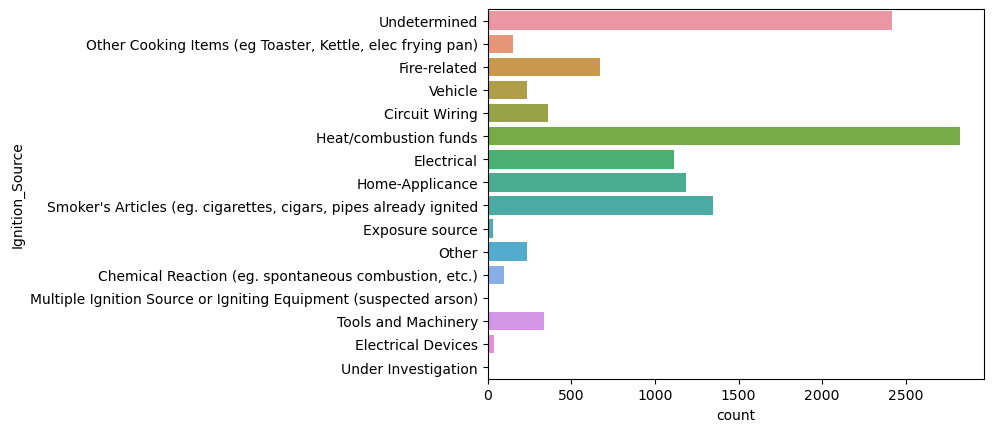

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(y="Ignition_Source", data=df)
plt.show()


# Controlliamo Material_First_Ignited

In [38]:
import pandas as pd
pd.set_option('display.max_rows', None)


df['Material_First_Ignited'].value_counts()

Cooking Oil, Grease                                        1444
Rubbish, Trash, Waste                                      1270
Undetermined (formerly 98)                                 1100
Electrical Wiring Insulation                                742
Other                                                       739
Paper, Cardboard                                            416
Wood                                                        398
Plastic                                                     394
Interior Wall/Ceiling                                       378
Cabinetry                                                   340
Upholstered Sofa, Chair, etc.                               297
Mattress, Pillow                                            254
Other Soft Goods, Wearing Apparel                           230
Insulation                                                  228
Multiple Objects or Materials                               197
Vehicle                                 

In [39]:
df['Material_First_Ignited'].replace(['Gasoline', 'Propane', 'Natural Gas', 'Other Flammable, Combustible Liquid', 'Other chemicals, materials not classified above', 'Other Gases', 'Diesel Fuel/Fuel Oil', 'Alcohol (methanol)', 'Oxidizing material (inc bleach, peroxide)', 'Pyrophoric metals', 'Oily rags (inc. paint rags, etc)'], 'Flammable', inplace=True)


In [40]:
df['Material_First_Ignited'].replace(['Nest', 'Christmas Tree', 'Paint, varnish stored in container'], 'Other', inplace=True)

In [41]:
df['Material_First_Ignited'].replace(['Rug, Carpet', 'Curtain, Drapery'], 'Furnishings', inplace=True)

In [42]:
df['Material_First_Ignited'].replace(['Agricultural Product - Grown (eg. straw, seeds, etc.)', 'Agricultural Product - Other (eg pesticide, fertilizer)'], 'Agricultural Product', inplace=True)

In [43]:
df['Material_First_Ignited'].replace(['Non-upholstered Chair, etc.'], 'Upholstered Sofa, Chair, etc.', inplace=True)

In [44]:
df['Material_First_Ignited'].replace('Oily rags (inc. paint rags, etc)', 'Flammable', inplace=True)


In [45]:
df['Material_First_Ignited'].replace(['Other Soft Goods, Wearing Apparel','Wearing Apparel on a Person'], 'Clothing', inplace=True)

In [46]:
df['Material_First_Ignited'].replace(['Paper, Cardboard', 'Books, Magazines, Newspapers'], 'Paper', inplace=True)

In [47]:
df['Material_First_Ignited'].replace(['Paper, Cardboard', 'Books, Magazines, Newspapers'], 'Paper', inplace=True)

In [48]:
df['Material_First_Ignited'].replace(['Fabric - Synthetic, Combination', 'Fabric - Natural (eg. cotton, wool, etc.)'], 'Fabric Product', inplace=True)

In [49]:
df['Material_First_Ignited'].value_counts()

Cooking Oil, Grease                 1444
Rubbish, Trash, Waste               1270
Undetermined (formerly 98)          1100
Other                                771
Electrical Wiring Insulation         742
Paper                                570
Wood                                 398
Plastic                              394
Interior Wall/Ceiling                378
Cabinetry                            340
Upholstered Sofa, Chair, etc.        336
Flammable                            328
Clothing                             262
Mattress, Pillow                     254
Insulation                           228
Fabric Product                       201
Multiple Objects or Materials        197
Vehicle                              192
Linen Other than Bedding             162
Creosote (chimney, flue pipe)        148
Exterior Roof Covering               139
Bedding                              134
Furnishings                          133
Exterior Cladding                    126
Other Building C

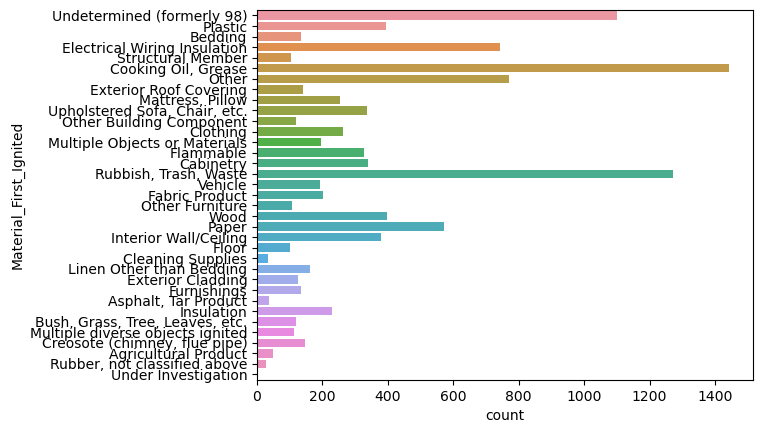

In [50]:
sns.countplot(y="Material_First_Ignited", data=df)
plt.show()

# Controlliamo "Property_Use"

In [51]:
#df.head()
df['Property_Use'].value_counts()

Multi-Unit Dwelling - Over 12 Units                                      3711
Detached Dwelling                                                        2299
Semi-Detached Dwelling                                                    694
Attached Dwelling (eg. rowhouse, townhouse, etc.)                         547
Multi-Unit Dwelling - 2 to 6 Units                                        280
Apartment, Flat, Tenement with Business                                   271
Restaurants (occupant load greater than 30 persons, licensed)             226
Restaurant (occupant load less than 30 persons)                           157
Multi-Unit Dwelling - 7 to 12 Units                                       145
Detached Garage                                                           133
Subway Station                                                            132
Rooming/Boarding/Lodging House                                            121
General Business Office                                         

In [52]:
fig = px.histogram(df, x="Property_Use")
fig.show()

In [53]:
vc = df['Property_Use'].value_counts()
to_remove = vc[vc < 10].index
df = df[~df['Property_Use'].isin(to_remove)]


In [54]:
df['Property_Use'].replace(['Mfg: Chemicals, inc hazardous chemicals', 
                                      'Mfg: Printing, Publishing (eg newspapers, magazines, books)', 
                                      'Mfg: Rubber Goods', 
                                      'Mfg: Other Chemical/Petroleum/Paint/Plastic Products',
                                      'Mfg: Plastics', 'Mfg: Road Vehicles, Parts', 
                                      'Mfg: Secondary Metal Processing (eg rolling, drawing, polishing)', 
                                      'Mfg: Other Agr/Food, Beverage, Tabac products', 
                                      'Mfg: Grain Products, Bakery Goods', 
                                      'Mfg: Other Metal/Eletctrical/Miscellaneous Products', 
                                      'Mfg: Other Wood, Furniture, Paper Products, Printing', 
                                      'Mfg: Secondary Processing (eg finished goods, furniture, etc)', 
                                      'Mfg: Pulp, Paper Processing'], 
                                      'Mfg', inplace=True)

In [55]:
df['Property_Use'].replace(['School - Elementary', 
                                  'School - Post Secondary (University)', 
                                  'School - Secondary/Senior High (Gr. 9+)', 
                                  'School - Secondary Junior High (Gr. 7 & 8)'], 
                                  'School', inplace=True)

In [56]:
df['Property_Use'].replace(['Department Store', 
                                  'Mall - public area common to multi store facility', 
                                  'Supermarket, Grocery Store', 
                                  'Specialty Food Store (eg. butcher, delicatessen, etc.)', 
                                  'Convenience/Variety Store'], 
                                  'Retail Store', inplace=True)

In [57]:
df['Property_Use'].replace(['Other Business or Personal Services', 
                                  'Attached Dwelling with Business', 
                                  'Detached/Semi/Attached with Accessory Apartment Above Grade', 
                                  'Detached/Semi/Attached with Accessory Apartment Below Grade', 
                                  'Semi-Detached Dwelling with Business', 
                                  'Detached Dwelling with Business'], 
                                  'Mixed-Use-Building', inplace=True)

In [58]:
df['Property_Use'].replace(['Public/Private Hospital', 
                                  'Psychiatric Hospital (with detention quarters)', 
                                  'Seniors long term care facility, licensed', 
                                  'Retirement Home', 
                                  'Laundry, Dry Cleaner (includes self-service)'], 
                                  'Healthcare Facility', inplace=True)

In [59]:
df['Property_Use'].replace(['Barber Shop, Hairdresser, Beauty Parlor, tanning salon', 
                                  'Dental/Medical Office', 
                                  'Pharmacy'], 
                                  'Personal Care Facility', inplace=True)

In [60]:
df['Property_Use'].replace(['Church, Other Similar Place of Worship', 
                                  'Community/Exhibition/Dance Hall', 
                                  'Sports/Country/Social/Yacht Club', 
                                  'Theatre - Motion Picture', 'Bar, Tavern, Night Club'], 
                                  'Entertainment Venue', inplace=True)

In [61]:
df['Property_Use'].replace(['Recycling Facility', 'Waste Transfer Station'], 
                                  'Waste Management', inplace=True)

In [62]:
df['Property_Use'].replace(['Clothing Store, Accessories, fur', 'Furniture/Appliance Store'], 
                                  'Retail Store', inplace=True)

In [63]:
df['Property_Use'].value_counts()
#df['Property_Use'].describe()

Multi-Unit Dwelling - Over 12 Units                              3711
Detached Dwelling                                                2299
Semi-Detached Dwelling                                            694
Attached Dwelling (eg. rowhouse, townhouse, etc.)                 547
Mfg                                                               309
Multi-Unit Dwelling - 2 to 6 Units                                280
Apartment, Flat, Tenement with Business                           271
Mixed-Use-Building                                                234
Restaurants (occupant load greater than 30 persons, licensed)     226
Retail Store                                                      181
Restaurant (occupant load less than 30 persons)                   157
Multi-Unit Dwelling - 7 to 12 Units                               145
Healthcare Facility                                               141
School                                                            135
Detached Garage     

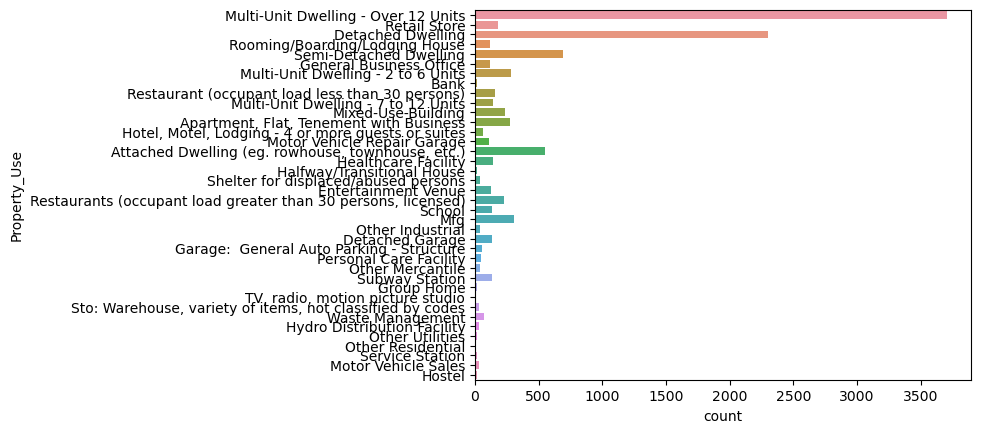

In [64]:
sns.countplot(y="Property_Use", data=df)
plt.show()

In [74]:
df['Ignition_Source'].replace("Smoker's Articles (eg. cigarettes, cigars, pipes already ignited", 
                              "Smoker Articles", inplace=True)

In [65]:
df['Business_Impact'].value_counts()

Not applicable (not a business)         4975
No business interruption                4268
Undetermined                             646
May resume operations within a week      545
May resume operations within a month     107
May not resume operations                 48
May resume operations within a year       27
Name: Business_Impact, dtype: int64

In [66]:
df['Extent_Of_Fire'].value_counts()

Confined to object of origin                                                    4849
Confined to part of room/area of origin                                         3934
Spread to entire room of origin                                                  454
Spread beyond room of origin, same floor                                         439
Confined to roof/exterior structure                                              327
Spread to other floors, confined to building                                     253
Spread beyond building of origin, resulted in exposure fire(s)                    91
Entire Structure                                                                  80
Undetermined                                                                      78
Spread beyond building of origin                                                  44
Multi unit bldg: spread beyond suite of origin but not to separated suite(s)      37
Multi unit bldg: spread to separate suite(s)                     

In [67]:
df['Status_of_Fire_On_Arrival'].value_counts()

Fire extinguished prior to arrival                                                 3464
Fire with no evidence from street                                                  2772
Fire with smoke showing only - including vehicle, outdoor fires                    2455
Flames showing from small area (one storey or less, part of a vehicle, outdoor)    1322
Flames showing from large area (more than one storey, large area outdoors)          217
Fully involved (total structure, vehicle, spreading outdoor fire)                   199
Unclassified                                                                        156
Exposure involved                                                                    31
Name: Status_of_Fire_On_Arrival, dtype: int64

In [68]:
df['Possible_Cause'].value_counts()

Undetermined                                                         1598
Unattended                                                           1552
Electrical Failure                                                   1464
Improperly Discarded                                                 1411
Other unintentional cause, not classified                             994
Improper handling of ignition source or ignited material              770
Unintentional, cause undetermined                                     632
Routine maintenance deficiency, eg creosote, lint, grease buildup     498
Design/Construction/Installation/Maintenance Deficiency               408
Used or Placed too close to combustibles                              366
Other misuse of ignition source/material ignited                      255
Mechanical Failure                                                    231
Suspected Arson                                                       117
Improper Storage                      

In [69]:
df['Fire_Alarm_System_Impact_on_Evacuation'].value_counts()

Not applicable: No fire alarm system, no persons present                              2876
Not applicable: Occupant(s) first alerted by other means                              2434
All persons (at risk of injury) evacuated as a result of hearing fire alarm system    1902
Undetermined                                                                          1499
Some persons (at risk) evacuated as a result of hearing fire alarm system             1214
No one (at risk) evacuated as a result of hearing fire alarm system                    655
Fire Alarm system operated but failed to alert occupant(s)                              36
Name: Fire_Alarm_System_Impact_on_Evacuation, dtype: int64

In [70]:
df['Fire_Alarm_System_Operation'].value_counts()

Fire alarm system operated                  4322
Not applicable (no system)                  3661
Fire alarm system did not operate           1324
Fire alarm system operation undetermined    1309
Name: Fire_Alarm_System_Operation, dtype: int64

In [71]:
df['Fire_Alarm_System_Presence'].value_counts()

Fire alarm system present                                                 5925
Not applicable (bldg not classified by OBC OR detached/semi/town home)    1840
No Fire alarm system                                                      1708
Undetermined                                                              1143
Name: Fire_Alarm_System_Presence, dtype: int64

In [72]:
df['Method_Of_Fire_Control'].value_counts()

Extinguished by fire department     6642
Extinguished by occupant            2715
Fire self extinguished               588
Extinguished by automatic system     432
Action taken unclassified            239
Name: Method_Of_Fire_Control, dtype: int64

In [73]:
df.shape

(10616, 27)

In [ ]:
df.to_csv('./datasets/fire_knowledge.csv')